Ejercicio 1.
Genera una imagen semejante a un tablero de ajedrez tomando en cuenta que cada casilla debe medir
100x100 px como se muestra en la imagen a continuación (toma encuenta la saturación de los colores)


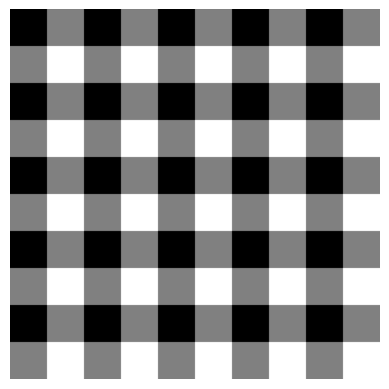

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rows, cols = 10, 10
cell_size = 100  

board = np.zeros((rows * cell_size, cols * cell_size, 3), dtype=np.uint8)

black = [0, 0, 0]
gray = [128, 128, 128]
white = [255, 255, 255]

for row in range(rows):
    for col in range(cols):
        start_x, end_x = col * cell_size, (col + 1) * cell_size
        start_y, end_y = row * cell_size, (row + 1) * cell_size

        if row % 2 == 0:  
            color = black if col % 2 == 0 else gray
        else:  
            color = gray if col % 2 == 0 else white

        board[start_y:end_y, start_x:end_x] = color

plt.imshow(board)
plt.axis('off')  
plt.show()


Ejercicio 2.
Genera una imagen como la de referencia.


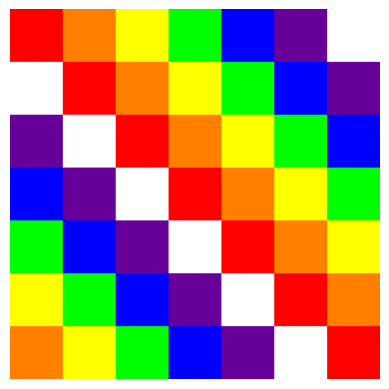

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rows, cols = 7, 7  
cell_size = 100  

colores = [
    [255, 0, 0],    # Rojo
    [255, 127, 0],  # Naranja
    [255, 255, 0],  # Amarillo
    [0, 255, 0],    # Verde
    [0, 0, 255],    # Azul
    [102, 0, 153],  # Violeta
    [255, 255, 255] 
]

wiphala = np.zeros((rows * cell_size, cols * cell_size, 3), dtype=np.uint8)

for row in range(rows):
    for col in range(cols):
        start_x, end_x = col * cell_size, (col + 1) * cell_size
        start_y, end_y = row * cell_size, (row + 1) * cell_size

       
        color_index = (row - col) % 7 
        wiphala[start_x:end_x,start_y:end_y] = colores[color_index]

plt.imshow(wiphala)
plt.axis('off')  
plt.show()



Ejercicio 3.
Haciendo uso de la imagen1.jpg obtiene el siguiente resultado.


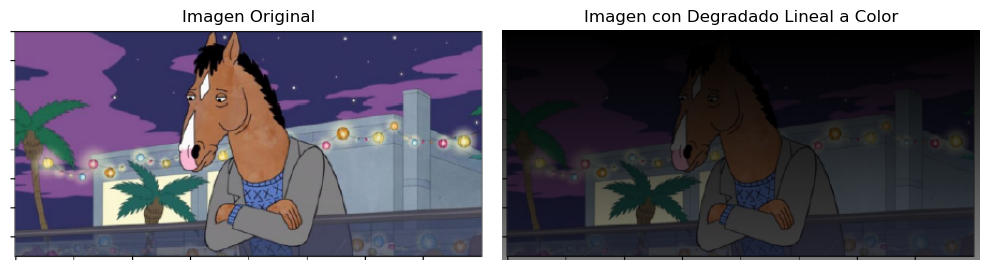

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imagen = cv2.imread('imagen1.png')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

altura, anchura, _ = imagen.shape
degradado = np.linspace(0, 0.5, altura) 
degradado = degradado[:, np.newaxis] 

imagen_degradada = imagen.astype(float)
for i in range(altura):
    imagen_degradada[i] = imagen_degradada[i] * degradado[i]

imagen_degradada = np.clip(imagen_degradada, 0, 255).astype(np.uint8)

imagen_degradada_rgb = cv2.cvtColor(imagen_degradada, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 2)
plt.imshow(imagen_degradada_rgb)
plt.title('Imagen con Degradado Lineal a Color')
plt.axis('off')

plt.tight_layout()
plt.show()





Ejercicio 4
Haciendo uso de la imagen1.jpg obtiene el siguiente resultado

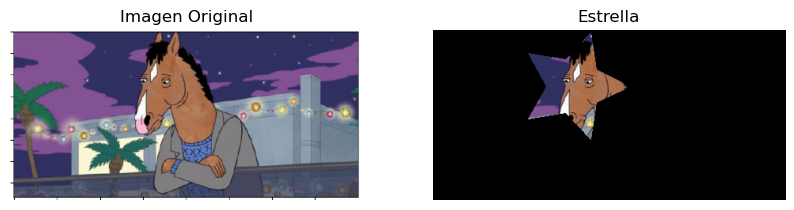

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread("imagen1.png")  
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

mascara = np.zeros_like(imagen[:, :, 0], dtype=np.uint8)

altura, ancho = imagen.shape[:2]
centro = (ancho // 2.5, altura // 3)
radio_ext = min(ancho, altura) // 3
radio_int = radio_ext // 2

puntos = []
for i in range(10):
    angulo = np.pi / 5 * i
    radio = radio_ext if i % 2 == 0 else radio_int
    x = int(centro[0] + radio * np.cos(angulo))
    y = int(centro[1] - radio * np.sin(angulo))
    puntos.append((x, y))

puntos = np.array(puntos, np.int32).reshape((-1, 1, 2))

cv2.fillPoly(mascara, [puntos], 255)
imagen_recortada = cv2.bitwise_and(imagen, imagen, mask=mascara)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_recortada)
plt.title("Estrella")
plt.axis("off")

plt.show()


Ejercicio 5.
Tomando en cuenta la imagen1.jpg elige un punto de interés al azar (funcion randomica), genera su
histograma por canales, solariza y posteriza la imagen, realiza un tratamiento de umbralización(el de
preferencia), mezcla tecnicas y obtiene un filtro artistico,lista todas las imágenes con sus correspondientes
titulos, guarda todas las imágenes resultantes con sus nombres.

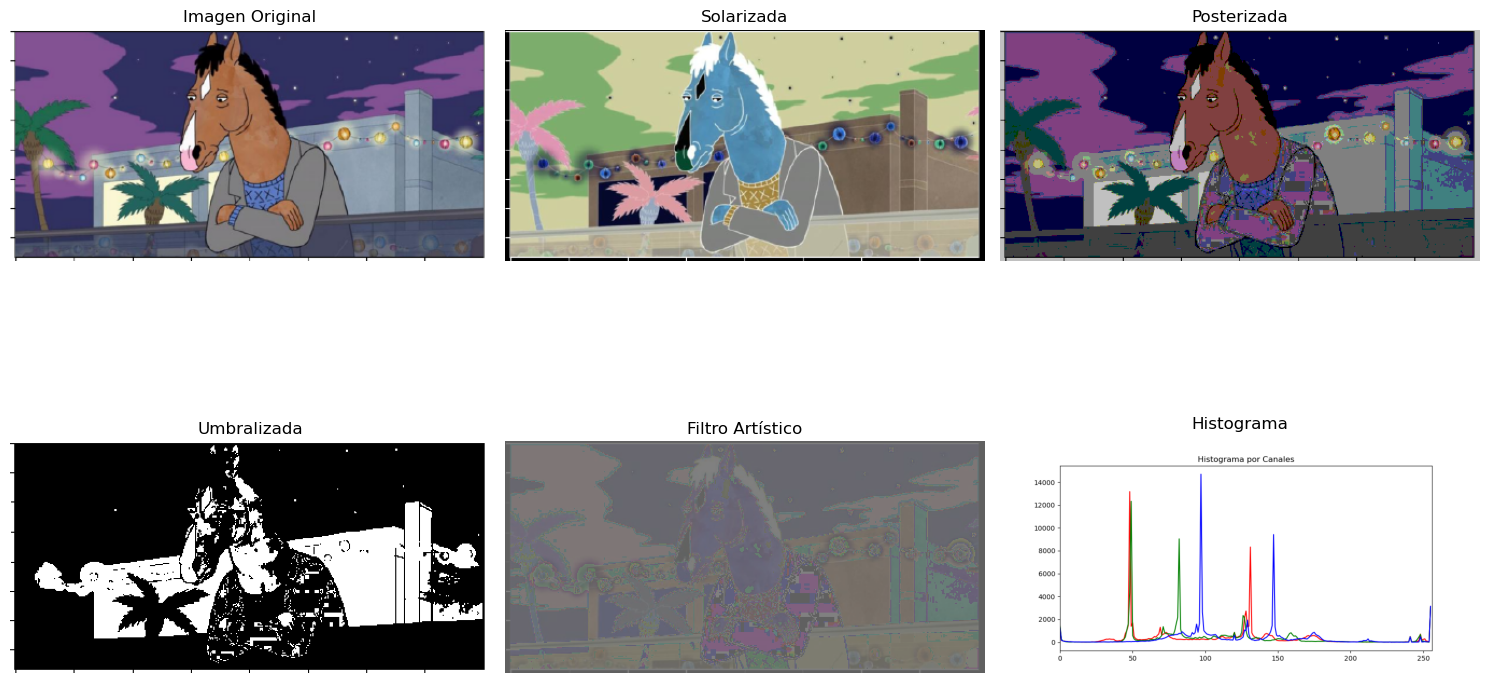

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

image_path = "imagen1.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h, w, _ = image.shape
x, y = random.randint(0, w-1), random.randint(0, h-1)
punto_interes = image[y, x]

colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title("Histograma por Canales")
plt.savefig("histograma.png")
plt.close()

solarized = 255 - image
cv2.imwrite("solarizada.jpg", cv2.cvtColor(solarized, cv2.COLOR_RGB2BGR))


levels = 4
posterized = (image // (256//levels)) * (256//levels)
cv2.imwrite("posterizada.jpg", cv2.cvtColor(posterized, cv2.COLOR_RGB2BGR))

_, thresholded = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("umbralizada.jpg", thresholded)

filtered = cv2.addWeighted(solarized, 0.5, posterized, 0.5, 0)
cv2.imwrite("filtro_artistico.jpg", cv2.cvtColor(filtered, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image)
axes[0, 0].set_title("Imagen Original")
axes[0, 0].axis("off")

axes[0, 1].imshow(solarized)
axes[0, 1].set_title("Solarizada")
axes[0, 1].axis("off")

axes[0, 2].imshow(posterized)
axes[0, 2].set_title("Posterizada")
axes[0, 2].axis("off")

axes[1, 0].imshow(thresholded, cmap="gray")
axes[1, 0].set_title("Umbralizada")
axes[1, 0].axis("off")

axes[1, 1].imshow(filtered)
axes[1, 1].set_title("Filtro Artístico")
axes[1, 1].axis("off")

axes[1, 2].imshow(plt.imread("histograma.png"))
axes[1, 2].set_title("Histograma")
axes[1, 2].axis("off")

plt.tight_layout()
plt.savefig("resultados.jpg")
plt.show()

Teoría:
¿A que nos referimos si hablamos de una imagen digital?
Las imágenes digitales son fotos electrónicas tomadas de una escena o escaneadas de documentos, fotografías, manuscritos, textos impresos e ilustraciones.


¿Qué es la profundidad del color?
La profundidad de color es la cantidad de colores que se puede mostrar una imagen, y se mide en bits por píxel. Cuando tienen mayor número de bits, tienen mas cantidad de colores que puede representar cada píxel.

¿Cuál es la diferencia entre CMKY y RGB?
RGB y CMYK son modos de color que se utilizan para mezclar colores en diseño gráfico. RGB se usa para pantallas digitales, mientras que CMYK se usa para impresión. 